In [1]:
import numpy as np
import pandas as pd

In [2]:
x1 = np.random.uniform(0,1,20000)
x2 = np.random.uniform(0,1,20000)
x3 = np.random.uniform(0,1,20000)
x4 = np.random.uniform(0,1,20000)
x5 = np.random.uniform(0,1,20000)
x6 = np.random.uniform(0,1,20000)
x7 = np.random.uniform(0,1,20000)
x8 = np.random.uniform(0,1,20000)
x9 = np.random.uniform(0,1,20000)
x10= np.random.uniform(0,1,20000)

### Create Drifts
One incremntal drift:

Start @ [5000]: changes x1, x3 and x5. They are now drawn from np.random.uniform(0,1+i) with i = 1
After every 1000 datapoints x1, x3 and x5 i += 1.
Stop when i = 10

In [3]:
j = 0
for i in range(1,10):
    x1[5000+j:6000+j]=np.random.uniform(0,1+i,1000)
    x3[5000+j:6000+j]=np.random.uniform(0,1+i,1000)
    x5[5000+j:6000+j]=np.random.uniform(0,1+i,1000)
    
    j += 1000
        
y = 10*np.sin(np.pi*x1*x2)+20*(x3-0.5)**2 + 10*x4 + 5*x5 + np.random.normal(0,1)


In [4]:
data = pd.DataFrame([x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y]).transpose()
data.columns = ['x1','x2','x3','x4','x5','x6','x7','x8','x9','x10', 'y']

In [5]:
data

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,y
0,0.213123,0.914511,0.529169,0.855246,0.457276,0.409271,0.414192,0.123871,0.552210,0.240846,17.148681
1,0.236640,0.561304,0.562876,0.448645,0.364565,0.821614,0.622813,0.633720,0.958946,0.684494,10.986422
2,0.763112,0.750164,0.784491,0.540628,0.079335,0.243474,0.964413,0.812691,0.522259,0.739716,17.708935
3,0.925724,0.483521,0.926468,0.877249,0.496553,0.738427,0.759914,0.915616,0.009864,0.385673,25.302855
4,0.455391,0.115913,0.161664,0.081915,0.432421,0.823599,0.191752,0.282694,0.368619,0.885757,7.466668
...,...,...,...,...,...,...,...,...,...,...,...
19995,0.320237,0.935760,0.836078,0.277477,0.078870,0.536769,0.675824,0.344975,0.631594,0.419717,14.057313
19996,0.343024,0.709978,0.002653,0.690382,0.544383,0.134820,0.573088,0.775536,0.779334,0.972259,22.044178
19997,0.374447,0.752677,0.189095,0.523457,0.851798,0.046698,0.037638,0.288186,0.364610,0.155974,19.713861
19998,0.002349,0.470892,0.749987,0.982085,0.595223,0.900887,0.727877,0.845198,0.738293,0.907617,14.626849


In [6]:
data.to_csv('friedman_with_incremental_drift_new.csv', index=False)

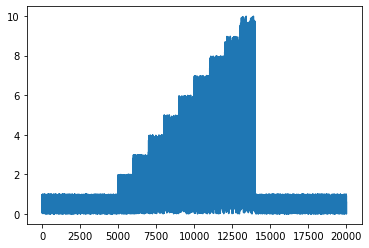

In [7]:
import matplotlib.pyplot as plt
plt.plot(data['x1'])

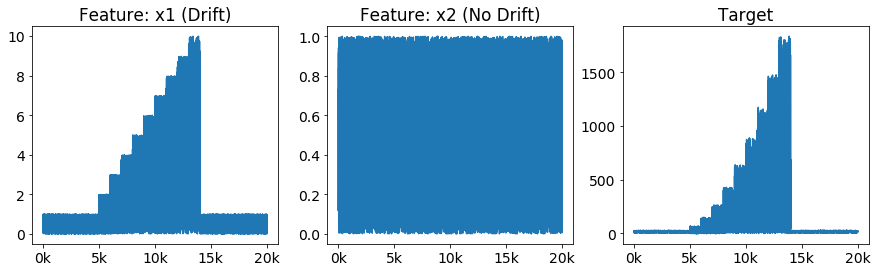

In [9]:
import matplotlib.ticker as ticker

#Plot features
font = {'size'   : 14}

plt.rc('font', **font)
fig, ax = plt.subplots(1, 3, figsize=(15,4))


ax[0].plot(data['x1'])
ax[0].set_title('Feature: x1 (Drift)')
ax[0].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))

ax[1].plot(data['x2'])
ax[1].set_title('Feature: x2 (No Drift)')
ax[1].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))

ax[2].plot(data['y'])
ax[2].set_title('Target')
ax[2].xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{}'.format(int(x/1000)) + 'k'))



plt.savefig('friedman_incremental.png', bbox_inches='tight', dpi=300)